In [2]:
import numpy as np
from metpy.units import units
import metpy.calc as mpcalc
from metpy.plots import add_metpy_logo, SkewT
import os, sys, datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
os.environ['ROOT_DATA_DIR']='/work/handong28/database'
sys.path.extend(['/work/handong28/heterogeneous/DeepQPF_ChiaTung/training'])
from core.specific_humidity import readERAFile

In [10]:
file_path_era5 = '/work/handong28/database/era5/2019/201907/era5_20190722.nc'
file_path_era5qv = '/work/handong28/database/era5_qv/2019/201907/era5_20190722.npy'

p, t, rh, u, v = readERAFile(file_path_era5).load() #[level, t, r, u, v]
qv = np.load(file_path_era5qv) #[qv]

In [11]:
t = np.mean(t, axis=(2, 3))
rh = np.mean(rh, axis=(2, 3))
qv = np.mean(qv, axis=(2, 3))
t= t[4] * units.kelvin
rh = rh[4] * units.percent
qv = qv[4] * units.dimensionless
p = p * units.hPa
td = mpcalc.dewpoint_from_relative_humidity(t, rh)

In [12]:
t

Magnitude,[195.41967748008994 223.3512901368127 245.56637434791676 259.45849882675043 268.85694884322015 272.6081578245177 275.93494819539706 279.8976296897226 283.622369411908 286.87051248023795 288.35726963441994 289.8058846362179 291.1801125731147 292.5304026583221 293.8454819714667 295.1151801490464 296.3201432392995 297.38968655803575 298.6803622615764 300.606700156707]
Units,kelvin


In [9]:
t

Magnitude,[197.26066228951345 222.46314760869464 245.04632630602882 259.7947222779763 269.76896616751543 273.8008333665336 277.5449632384492 281.50242849476064 285.10991247248063 288.1963238836127 289.45845393487684 290.6766323218605 291.8894937794697 293.0888997100777 294.26125970770363 295.4821006057439 296.72670448240353 297.8700007575132 299.3701004900006 301.30678189869786]
Units,kelvin


# skew T

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


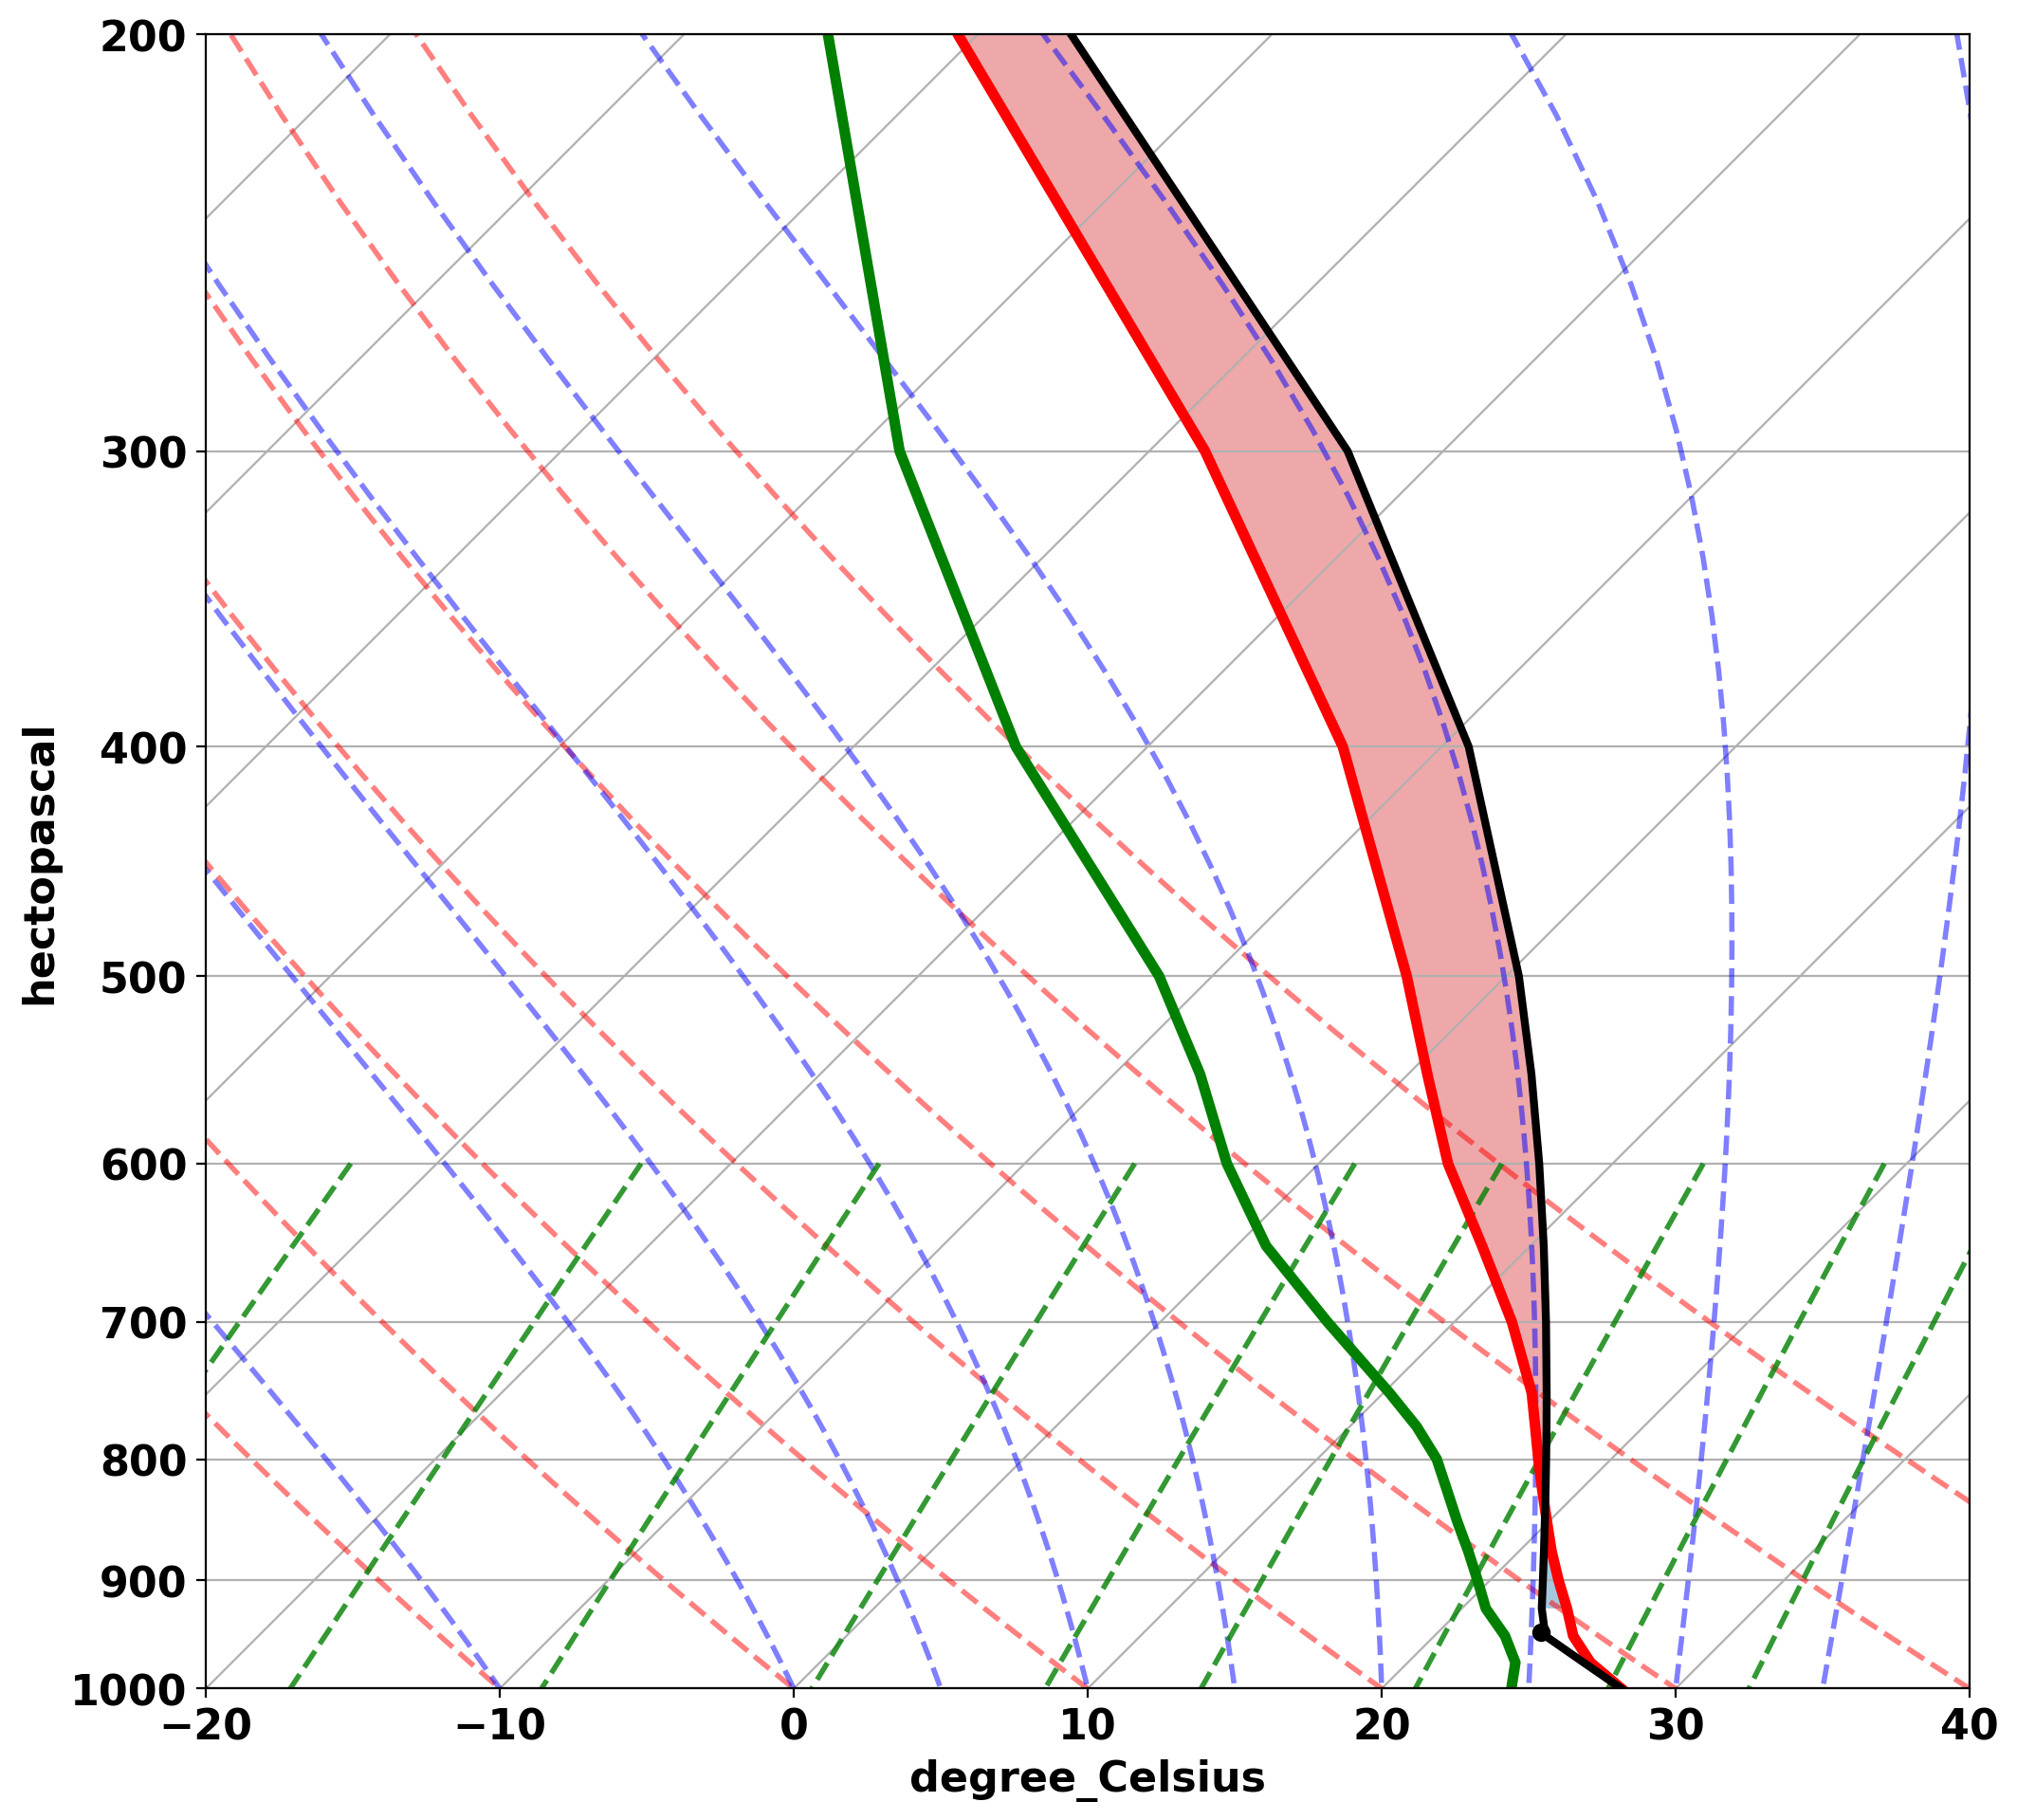

In [5]:
# Change default to be better for skew-T
# plt.rcParams['figure.figsize'] = (9, 9)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
axes = {'titlesize'  : 16,
        'titleweight': 'bold',
        'labelsize'  : 16,
        'labelweight': 'bold'
        }
mpl.rc('font', **font)  # pass in the font dict as kwargs
mpl.rc('axes', **axes)

fig = plt.figure(figsize=(12, 12), dpi=200)
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(p, t, 'r', lw=4)
skew.plot(p, td, 'g', lw=4)
skew.plot_dry_adiabats(linewidth=2)
skew.plot_moist_adiabats(linewidth=2)
skew.plot_mixing_lines(linewidth=2)
skew.ax.set_ylim(1000, 200)
skew.ax.set_xlim(-20, 40)

# Calculate LCL height and plot as black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
lcl_pressure, lcl_temperature = mpcalc.lcl(p[-1], t[-1], td[-1])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p[::-1], t[-1], td[-1]).to('degC')
skew.plot(p[::-1], prof, 'k', linewidth=3)

# Shade areas of CAPE and CIN
skew.shade_cin(p[::-1], t[::-1], prof, td[::-1])
skew.shade_cape(p[::-1], t[::-1], prof)

# some tries

In [ ]:
temperature = [20] * units.degC
rel_humidity  = [50] * units.percent
print(mpcalc.dewpoint_from_relative_humidity(temperature, rel_humidity))

In [ ]:
temperature = t[3, 5, 5, 5] * units.kelvin
rel_humidity  = rh[3, 5, 5, 5] * units.percent
print(mpcalc.dewpoint_from_relative_humidity(temperature, rel_humidity))

In [ ]:
pressure = p[3] * units.hPa
dew_p = [-5.91571298765723] * units.degC
print(mpcalc.specific_humidity_from_dewpoint(pressure, dew_p))